In [1]:
import pandas as pd

# Load the Excel file
file_path = '/kaggle/input/mentidata/mentidata.xlsx'

# Load Sheet 6
df = pd.read_excel(file_path, sheet_name='Sheet 6 - forum', engine='openpyxl')
df.columns = ['PA', 'IVA', 'SA', 'SEA']
print(df.columns)
df = df.drop(index=0).reset_index(drop=True)
df.head()

Index(['PA', 'IVA', 'SA', 'SEA'], dtype='object')


,PA,IVA,SA,SEA
0,NaN,“My dad has been depressed fir as long as i ca...,NaN,"""It feels like his depression has skyrocketed ..."
1,NaN,NaN,NaN,"“It feels like everything I do is futile, and ..."
2,NaN,NaN,“My mum and dad have cut me off and it's been ...,“That part of my heart has been left empty and...
3,NaN,NaN,NaN,“now I feel more depressed than ever feel alon...
4,“I have also gained so much weight in the last...,NaN,“I have no social interactions as I feel unwor...,“I have no motivation I am crying all the time...


In [2]:
df.shape

(481, 4)

In [3]:
data = []

import re  # Importing the regular expressions module
# Iterate over each row
for index, row in df.iterrows(): 
    for category in df.columns:
        text_data = row[category]
        if pd.notna(text_data) and text_data != '':
            text_data = text_data.replace('“', '"').replace('”', '"')
            # Split the text data by double quotes and strip whitespace
            texts = [text.strip() for text in text_data.split('"') if text.strip()]
#             texts = [text.strip() for text in re.split(r'["\”]', text_data) if text.strip()]
            for text in texts: 
                data.append([text, category])  # Append each text and its category


# Create a new DataFrame
new_df = pd.DataFrame(data, columns=['Text', 'Category'])

# Display the new DataFrame
import IPython.display as display
display.display(new_df)

,Text,Category
0,My dad has been depressed fir as long as i can...,IVA
1,It feels like his depression has skyrocketed t...,SEA
2,he is 60 years old but im only 19 and have my ...,SEA
3,ive been having nightmares and i really just d...,SEA
4,"It feels like everything I do is futile, and a...",SEA
...,...,...
1593,I feel guilty for my depression,SEA
1594,Life was great. until about 4 weeks ago the lo...,SA
1595,I’m already in so much pain I don’t know if my...,SEA
1596,I’ve been doing a lot of trauma recovery work ...,PA


In [4]:
new_df.shape

(1598, 2)

In [5]:
category_counts = new_df['Category'].value_counts()
# Convert the counts to a DataFrame
category_counts_df = category_counts.reset_index()
category_counts_df.columns = ['Category', 'Count']  # Rename columns

# Display the counts DataFrame
import IPython.display as display
display.display(category_counts_df)

,Category,Count
0,SEA,699
1,SA,398
2,PA,321
3,IVA,180


In [6]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
new_df['Text'] = new_df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
new_df.head(15)

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


,Text,Category
0,My dad depressed fir long remember seriously i...,IVA
1,It feels like depression skyrocketed point I'm...,SEA
2,60 years old im 19 mental health struggles din...,SEA
3,ive nightmares really dont know make ok beyond...,SEA
4,"It feels like everything I futile, anything ma...",SEA
5,"I struggle lot articulating thoughts well, fee...",SEA
6,I'm becoming frustrated lack progress therapy ...,SEA
7,My mum dad cut like since 2004 sisters wont an...,SA
8,I always new I black sheep family. In father's...,SA
9,That part heart left empty hurting since I wan...,SEA


In [7]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target column
new_df['Category_Encoded'] = label_encoder.fit_transform(new_df['Category'])

# Display the DataFrame with encoded labels
print(new_df)

# To see the mapping of labels to integers
print("Class Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

                                                   Text Category  \
0     My dad depressed fir long remember seriously i...      IVA   
1     It feels like depression skyrocketed point I'm...      SEA   
2     60 years old im 19 mental health struggles din...      SEA   
3     ive nightmares really dont know make ok beyond...      SEA   
4     It feels like everything I futile, anything ma...      SEA   
...                                                 ...      ...   
1593                           I feel guilty depression      SEA   
1594  Life great. 4 weeks ago love life, woman I tho...       SA   
1595  I’m already much pain I don’t know heart take ...      SEA   
1596  I’ve lot trauma recovery work recent months ye...       PA   
1597  Really want help correct antidepressants comba...       PA   

      Category_Encoded  
0                    0  
1                    3  
2                    3  
3                    3  
4                    3  
...                ...  
1593    

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [9]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(new_df['Text'], new_df['Category_Encoded'], test_size=0.2, random_state=42)

In [10]:
# Step 1: Use CountVectorizer
count_vectorizer = CountVectorizer()
X_train_counts = count_vectorizer.fit_transform(X_train)

In [11]:
# Step 2: Apply TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [12]:
# Transform the test data
X_test_counts = count_vectorizer.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

In [13]:
# Verify the shapes
print(f"Training data shape: {X_train_tfidf.shape}")
print(f"Test data shape: {X_test_tfidf.shape}")

Training data shape: (1278, 3223)
Test data shape: (320, 3223)


# **NAIVE BAYES**

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [15]:
from sklearn.metrics import classification_report

In [16]:
# Multinomial Naive Bayes
nb_model = MultinomialNB()

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(nb_model, X_train_tfidf, y_train, cv=cv, scoring='accuracy')

In [17]:
# Print cross-validation results
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean():.4f}")

Cross-validation scores: [0.4453125  0.5078125  0.44140625 0.49411765 0.50588235]
Mean accuracy: 0.4789


In [18]:
# Fit the model on the entire training data
nb_model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = nb_model.predict(X_test_tfidf)

# Evaluate results
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.05      0.10        38
           1       0.70      0.11      0.18        66
           2       0.62      0.12      0.20        69
           3       0.48      0.96      0.64       147

    accuracy                           0.49       320
   macro avg       0.70      0.31      0.28       320
weighted avg       0.62      0.49      0.39       320



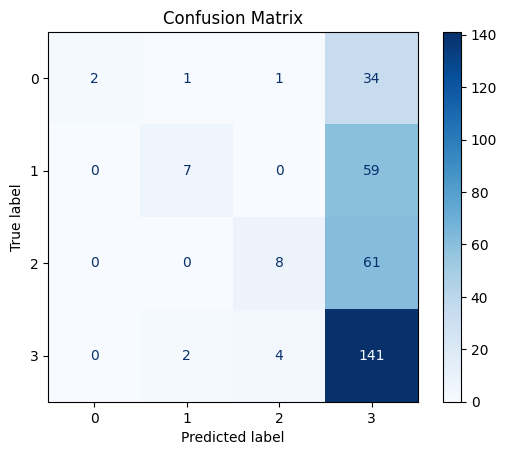

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=nb_model.classes_)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


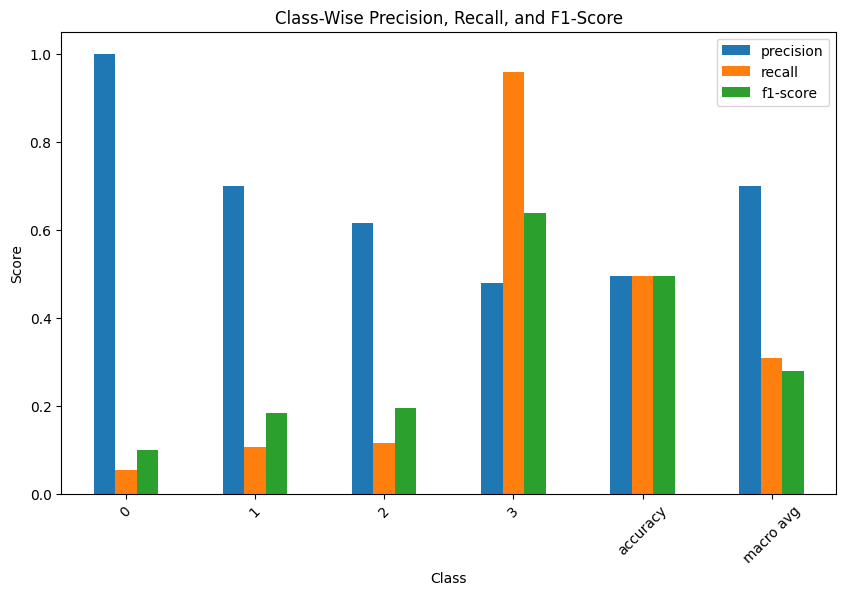

In [20]:
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns

# Generate classification report as a dataframe
report = classification_report(y_test, y_pred, target_names=nb_model.classes_, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot precision, recall, and F1-score
report_df.iloc[:-1, :-1].plot(kind="bar", figsize=(10, 6))
plt.title("Class-Wise Precision, Recall, and F1-Score")
plt.ylabel("Score")
plt.xlabel("Class")
plt.xticks(rotation=45)
plt.show()

# **SVM**

In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Initialize SVM classifier
svm_model = SVC(kernel='linear', gamma='auto', C=1, random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(svm_model, X_train_tfidf, y_train, cv=5, scoring='accuracy')

# Train the SVM on the entire training set
svm_model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test_tfidf)

# Evaluate the model
print("Cross-Validation Accuracy Scores: ", cv_scores)
print("Mean CV Accuracy: ", np.mean(cv_scores))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Cross-Validation Accuracy Scores:  [0.60546875 0.56640625 0.5234375  0.56078431 0.58039216]
Mean CV Accuracy:  0.567297794117647

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.45      0.59        38
           1       0.65      0.52      0.58        66
           2       0.52      0.46      0.49        69
           3       0.60      0.76      0.67       147

    accuracy                           0.61       320
   macro avg       0.65      0.55      0.58       320
weighted avg       0.62      0.61      0.60       320



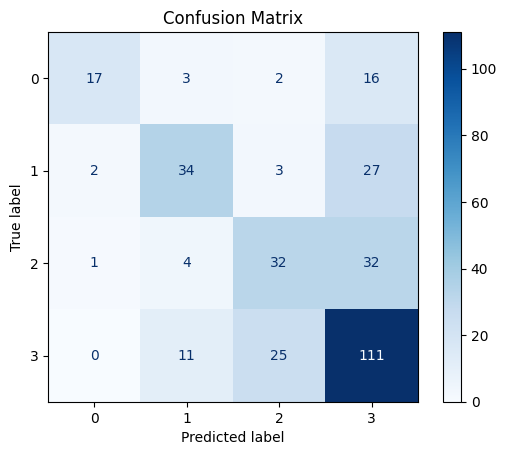

In [22]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=svm_model.classes_)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

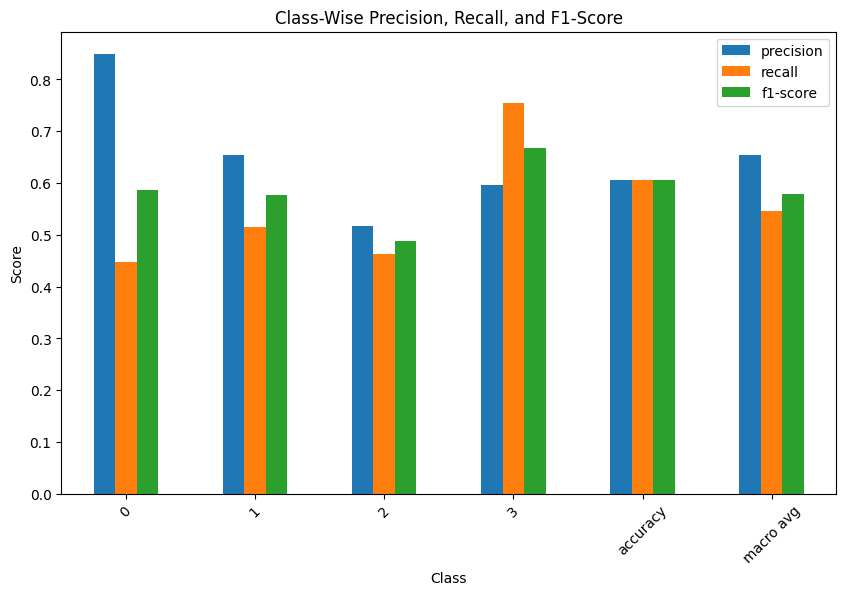

In [23]:
# Generate classification report as a dataframe
report = classification_report(y_test, y_pred, target_names=svm_model.classes_, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot precision, recall, and F1-score
report_df.iloc[:-1, :-1].plot(kind="bar", figsize=(10, 6))
plt.title("Class-Wise Precision, Recall, and F1-Score")
plt.ylabel("Score")
plt.xlabel("Class")
plt.xticks(rotation=45)
plt.show()

# **RANDOM FOREST CLASSIFIER**

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X_train_tfidf, y_train, cv=5, scoring='accuracy')

# Train the Random Forest on the entire training set
rf_model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test_tfidf)

# Evaluate the model
print("Cross-Validation Accuracy Scores: ", cv_scores)
print("Mean CV Accuracy: ", np.mean(cv_scores))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Cross-Validation Accuracy Scores:  [0.6015625  0.5703125  0.51171875 0.57254902 0.56470588]
Mean CV Accuracy:  0.5641697303921568

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.39      0.50        38
           1       0.67      0.33      0.44        66
           2       0.58      0.41      0.48        69
           3       0.56      0.83      0.67       147

    accuracy                           0.58       320
   macro avg       0.62      0.49      0.52       320
weighted avg       0.60      0.58      0.56       320



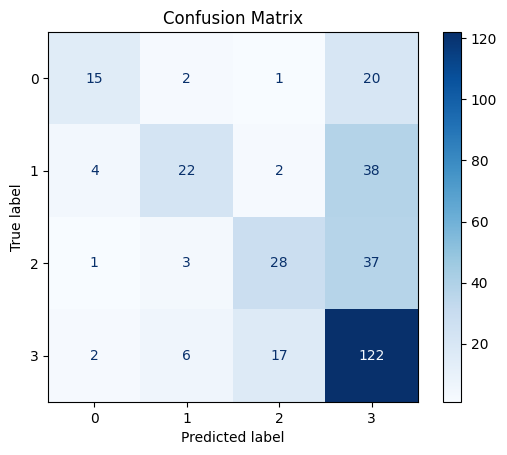

In [25]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=rf_model.classes_)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

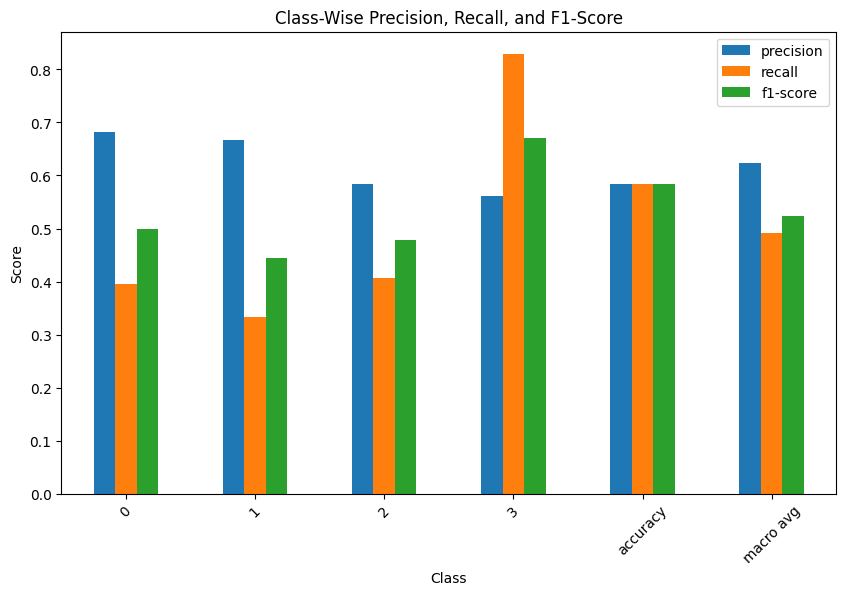

In [26]:
# Generate classification report as a dataframe
report = classification_report(y_test, y_pred, target_names=rf_model.classes_, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot precision, recall, and F1-score
report_df.iloc[:-1, :-1].plot(kind="bar", figsize=(10, 6))
plt.title("Class-Wise Precision, Recall, and F1-Score")
plt.ylabel("Score")
plt.xlabel("Class")
plt.xticks(rotation=45)
plt.show()

# **DECISION TREE**

In [27]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(dt_model, X_train_tfidf, y_train, cv=5, scoring='accuracy')

# Train the Decision Tree on the entire training set
dt_model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = dt_model.predict(X_test_tfidf)

# Evaluate the model
print("Cross-Validation Accuracy Scores: ", cv_scores)
print("Mean CV Accuracy: ", np.mean(cv_scores))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Cross-Validation Accuracy Scores:  [0.5390625  0.51171875 0.4765625  0.5254902  0.59215686]
Mean CV Accuracy:  0.5289981617647059

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.45      0.47        38
           1       0.37      0.30      0.33        66
           2       0.47      0.51      0.49        69
           3       0.54      0.59      0.56       147

    accuracy                           0.49       320
   macro avg       0.47      0.46      0.46       320
weighted avg       0.49      0.49      0.49       320



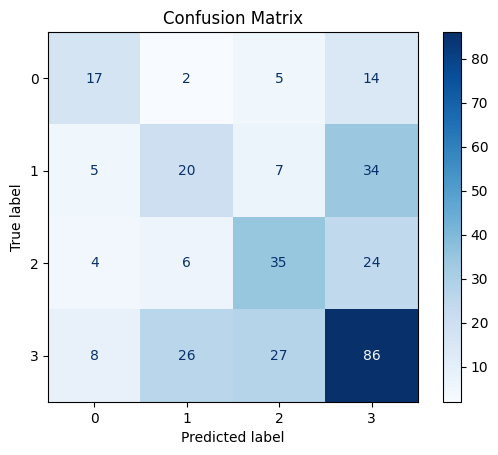

In [28]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=dt_model.classes_)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# **KNN** 

In [29]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Apply cross-validation
cv_scores = cross_val_score(knn, X_train_tfidf, y_train, cv=5)  # Using the TF-IDF transformed training data

# Print the cross-validation results
print(f'Cross-validation scores: {cv_scores}')
print(f'Average cross-validation score: {cv_scores.mean()}')

# Fit the model on the full training data and make predictions
knn.fit(X_train_tfidf, y_train)
y_pred = knn.predict(X_test_tfidf)

# Print the classification report
print(classification_report(y_test, y_pred))

Cross-validation scores: [0.53515625 0.546875   0.51171875 0.47843137 0.54117647]
Average cross-validation score: 0.522671568627451
              precision    recall  f1-score   support

           0       0.57      0.32      0.41        38
           1       0.54      0.52      0.53        66
           2       0.47      0.54      0.50        69
           3       0.66      0.71      0.69       147

    accuracy                           0.59       320
   macro avg       0.56      0.52      0.53       320
weighted avg       0.59      0.59      0.58       320



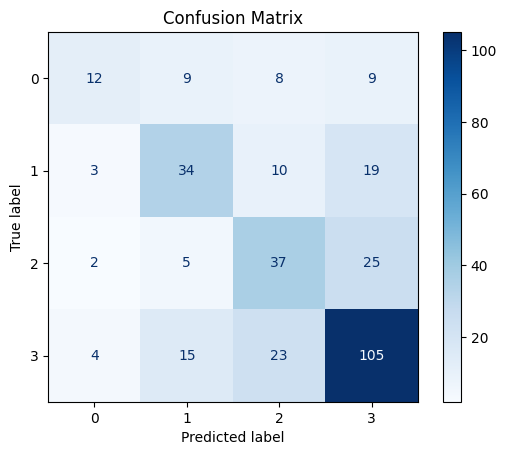

In [30]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()